In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"
strong_purple = "#9E5BD5"
middle_blue = "#61BDF7"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#4569BB"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [2]:
data_folder = r"E:\data\gst-0710-23\Sharing"
search_iteration = 100
N = 10
# Trajectory
with open(data_folder + r"\gg_position_K_0", 'rb') as infile:
    gg_trajectory_1 = pickle.load(infile)
with open(data_folder + r"\gg_position_K_3", 'rb') as infile:
    gg_trajectory_2 = pickle.load(infile)
with open(data_folder + r"\gg_position_K_6", 'rb') as infile:
    gg_trajectory_3 = pickle.load(infile)
with open(data_folder + r"\gg_position_K_9", 'rb') as infile:
    gg_trajectory_4 = pickle.load(infile)

with open(data_folder + r"\gs_position_K_0", 'rb') as infile:
    gs_trajectory_1 = pickle.load(infile)
with open(data_folder + r"\gs_position_K_3", 'rb') as infile:
    gs_trajectory_2 = pickle.load(infile)
with open(data_folder + r"\gs_position_K_6", 'rb') as infile:
    gs_trajectory_3 = pickle.load(infile)
with open(data_folder + r"\gs_position_K_9", 'rb') as infile:
    gs_trajectory_4 = pickle.load(infile)

with open(data_folder + r"\ss_position_K_0", 'rb') as infile:
    ss_trajectory_1 = pickle.load(infile)
with open(data_folder + r"\ss_position_K_3", 'rb') as infile:
    ss_trajectory_2 = pickle.load(infile)
with open(data_folder + r"\ss_position_K_6", 'rb') as infile:
    ss_trajectory_3 = pickle.load(infile)
with open(data_folder + r"\ss_position_K_9", 'rb') as infile:
    ss_trajectory_4 = pickle.load(infile)

with open(data_folder + r"\sg_position_K_0", 'rb') as infile:
    sg_trajectory_1 = pickle.load(infile)
with open(data_folder + r"\sg_position_K_3", 'rb') as infile:
    sg_trajectory_2 = pickle.load(infile)
with open(data_folder + r"\sg_position_K_6", 'rb') as infile:
    sg_trajectory_3 = pickle.load(infile)
with open(data_folder + r"\sg_position_K_9", 'rb') as infile:
    sg_trajectory_4 = pickle.load(infile)

# Fitness
with open(data_folder + r"\gg_fitness_values_K_0", 'rb') as infile:
    gg_fitness_1 = pickle.load(infile)
with open(data_folder + r"\gg_fitness_values_K_3", 'rb') as infile:
    gg_fitness_2 = pickle.load(infile)
with open(data_folder + r"\gg_fitness_values_K_6", 'rb') as infile:
    gg_fitness_3 = pickle.load(infile)
with open(data_folder + r"\gg_fitness_values_K_9", 'rb') as infile:
    gg_fitness_4 = pickle.load(infile)

with open(data_folder + r"\gs_fitness_values_K_0", 'rb') as infile:
    gs_fitness_1 = pickle.load(infile)
with open(data_folder + r"\gs_fitness_values_K_3", 'rb') as infile:
    gs_fitness_2 = pickle.load(infile)
with open(data_folder + r"\gs_fitness_values_K_6", 'rb') as infile:
    gs_fitness_3 = pickle.load(infile)
with open(data_folder + r"\gs_fitness_values_K_9", 'rb') as infile:
    gs_fitness_4 = pickle.load(infile)

with open(data_folder + r"\ss_fitness_values_K_0", 'rb') as infile:
    ss_fitness_1 = pickle.load(infile)
with open(data_folder + r"\ss_fitness_values_K_3", 'rb') as infile:
    ss_fitness_2 = pickle.load(infile)
with open(data_folder + r"\ss_fitness_values_K_6", 'rb') as infile:
    ss_fitness_3 = pickle.load(infile)
with open(data_folder + r"\ss_fitness_values_K_9", 'rb') as infile:
    ss_fitness_4 = pickle.load(infile)

with open(data_folder + r"\sg_fitness_values_K_0", 'rb') as infile:
    sg_fitness_1 = pickle.load(infile)
with open(data_folder + r"\sg_fitness_values_K_3", 'rb') as infile:
    sg_fitness_2 = pickle.load(infile)
with open(data_folder + r"\sg_fitness_values_K_6", 'rb') as infile:
    sg_fitness_3 = pickle.load(infile)
with open(data_folder + r"\sg_fitness_values_K_9", 'rb') as infile:
    sg_fitness_4 = pickle.load(infile)

# Cognitive Fitness
with open(data_folder + r"\gg_cog_fitness_values_K_0", 'rb') as infile:
    gg_cog_fitness_1 = pickle.load(infile)
with open(data_folder + r"\gg_cog_fitness_values_K_3", 'rb') as infile:
    gg_cog_fitness_2 = pickle.load(infile)
with open(data_folder + r"\gg_cog_fitness_values_K_6", 'rb') as infile:
    gg_cog_fitness_3 = pickle.load(infile)
with open(data_folder + r"\gg_cog_fitness_values_K_9", 'rb') as infile:
    gg_cog_fitness_4 = pickle.load(infile)

with open(data_folder + r"\gs_cog_fitness_values_K_0", 'rb') as infile:
    gs_cog_fitness_1 = pickle.load(infile)
with open(data_folder + r"\gs_cog_fitness_values_K_3", 'rb') as infile:
    gs_cog_fitness_2 = pickle.load(infile)
with open(data_folder + r"\gs_cog_fitness_values_K_6", 'rb') as infile:
    gs_cog_fitness_3 = pickle.load(infile)
with open(data_folder + r"\gs_cog_fitness_values_K_9", 'rb') as infile:
    gs_cog_fitness_4 = pickle.load(infile)

with open(data_folder + r"\ss_cog_fitness_values_K_0", 'rb') as infile:
    ss_cog_fitness_1 = pickle.load(infile)
with open(data_folder + r"\ss_cog_fitness_values_K_3", 'rb') as infile:
    ss_cog_fitness_2 = pickle.load(infile)
with open(data_folder + r"\ss_cog_fitness_values_K_6", 'rb') as infile:
    ss_cog_fitness_3 = pickle.load(infile)
with open(data_folder + r"\ss_cog_fitness_values_K_9", 'rb') as infile:
    ss_cog_fitness_4 = pickle.load(infile)

with open(data_folder + r"\sg_cog_fitness_values_K_0", 'rb') as infile:
    sg_cog_fitness_1 = pickle.load(infile)
with open(data_folder + r"\sg_cog_fitness_values_K_3", 'rb') as infile:
    sg_cog_fitness_2 = pickle.load(infile)
with open(data_folder + r"\sg_cog_fitness_values_K_6", 'rb') as infile:
    sg_cog_fitness_3 = pickle.load(infile)
with open(data_folder + r"\sg_cog_fitness_values_K_9", 'rb') as infile:
    sg_cog_fitness_4 = pickle.load(infile)

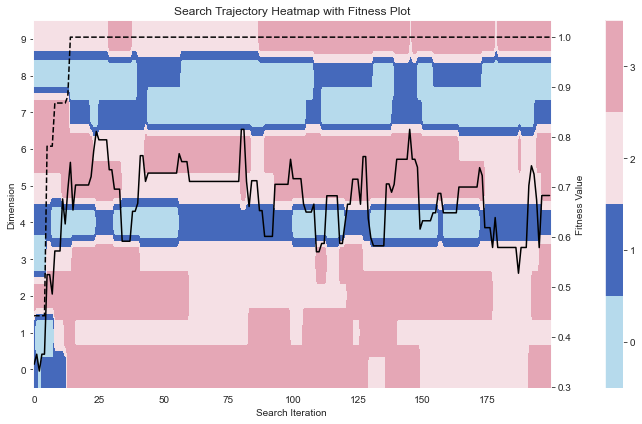

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# GG
# Generate random positions and fitness values
num_positions = search_iteration * 2
num_dimensions = N
# Needed info: positions, fitness, cog_fitness
positions = np.array(gg_trajectory_1, dtype=int)
fitness_values = gg_fitness_1
cog_fitness_values = gg_cog_fitness_1

# Create a colormap for the heatmap
# cmap = cm.get_cmap('viridis', 4)  # 4 colors for values 0, 1, 2, 3
cmap = colors.ListedColormap([shallow_blue, deep_blue, shallow_pink, deep_pink])

# Create the figure and two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis with ax1

# Set aspect ratio to 'auto' for proper proportions
im = ax1.imshow(positions.T, cmap=cmap, aspect='auto', extent=[-0.5, num_positions - 0.5, -0.5, num_dimensions - 0.5])

# Plot the fitness values as a line graph on the second y-axis
ax2.plot(range(num_positions), fitness_values, color='k', label="Fitness")
plt.plot(range(num_positions), cog_fitness_values, "k--", label="Cognitive Fitness")

# Set tick labels and limits for the x-axis
# x_ticks = np.arange(0, num_positions, 5)
# ax1.set_xticks(x_ticks)
# ax1.set_xticklabels(x_ticks)

# Set tick labels and limits for the y-axis (position dimension)
y_ticks = np.arange(num_dimensions)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks)
ax1.set_ylim([-0.5, num_dimensions - 0.5])

# Set tick labels and limits for the second y-axis (fitness values)
ax2.set_ylabel('Fitness Value')
# ax2.set_ylim([0, 1])

# Add colorbar
cbar = fig.colorbar(im, ax=ax2, pad=0.08)  # Adjust the pad value as needed
cbar.set_ticks([0.375, 1.125, 1.875, 2.625])  # Center the colorbar ticks
cbar.set_ticklabels(['0', '1', '2', '3'])

# Add labels and title
ax1.set_xlabel('Search Iteration')
ax1.set_ylabel('Dimension')
ax1.set_title('Search Trajectory Heatmap with Fitness Plot')
ax1.grid(visible=False)
ax2.grid(visible=False)
# Adjust spacing to accommodate the second y-axis label and colorbar
fig.tight_layout()

# Display the heatmap and fitness plot
plt.savefig(data_folder + r"\GG_Trajectory_K_0.png", transparent=False, dpi=300)
plt.show()


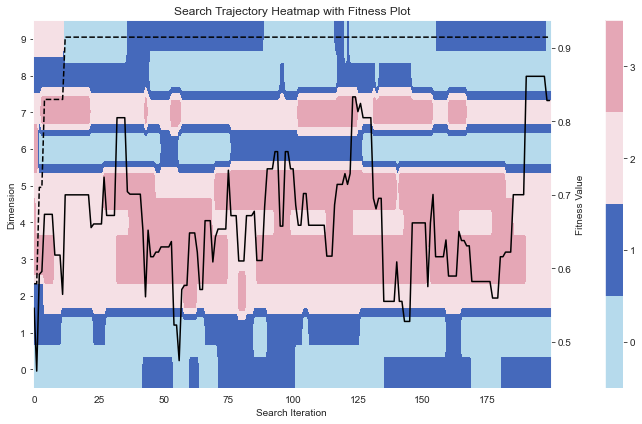

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# GG
# Generate random positions and fitness values
num_positions = search_iteration * 2
num_dimensions = N
# Needed info: positions, fitness, cog_fitness
positions = np.array(gg_trajectory_2, dtype=int)
fitness_values = gg_fitness_2
cog_fitness_values = gg_cog_fitness_2

# Create a colormap for the heatmap
# cmap = cm.get_cmap('viridis', 4)  # 4 colors for values 0, 1, 2, 3
cmap = colors.ListedColormap([shallow_blue, deep_blue, shallow_pink, deep_pink])

# Create the figure and two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis with ax1

# Set aspect ratio to 'auto' for proper proportions
im = ax1.imshow(positions.T, cmap=cmap, aspect='auto', extent=[-0.5, num_positions - 0.5, -0.5, num_dimensions - 0.5])

# Plot the fitness values as a line graph on the second y-axis
ax2.plot(range(num_positions), fitness_values, color='k', label="Fitness")
plt.plot(range(num_positions), cog_fitness_values, "k--", label="Cognitive Fitness")

# Set tick labels and limits for the x-axis
# x_ticks = np.arange(0, num_positions, 5)
# ax1.set_xticks(x_ticks)
# ax1.set_xticklabels(x_ticks)

# Set tick labels and limits for the y-axis (position dimension)
y_ticks = np.arange(num_dimensions)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks)
ax1.set_ylim([-0.5, num_dimensions - 0.5])

# Set tick labels and limits for the second y-axis (fitness values)
ax2.set_ylabel('Fitness Value')
# ax2.set_ylim([0, 1])

# Add colorbar
cbar = fig.colorbar(im, ax=ax2, pad=0.08)  # Adjust the pad value as needed
cbar.set_ticks([0.375, 1.125, 1.875, 2.625])  # Center the colorbar ticks
cbar.set_ticklabels(['0', '1', '2', '3'])

# Add labels and title
ax1.set_xlabel('Search Iteration')
ax1.set_ylabel('Dimension')
ax1.set_title('Search Trajectory Heatmap with Fitness Plot')
ax1.grid(visible=False)
ax2.grid(visible=False)
# Adjust spacing to accommodate the second y-axis label and colorbar
fig.tight_layout()

# Display the heatmap and fitness plot
plt.savefig(data_folder + r"\GG_Trajectory_K_3.png", transparent=False, dpi=300)
plt.show()


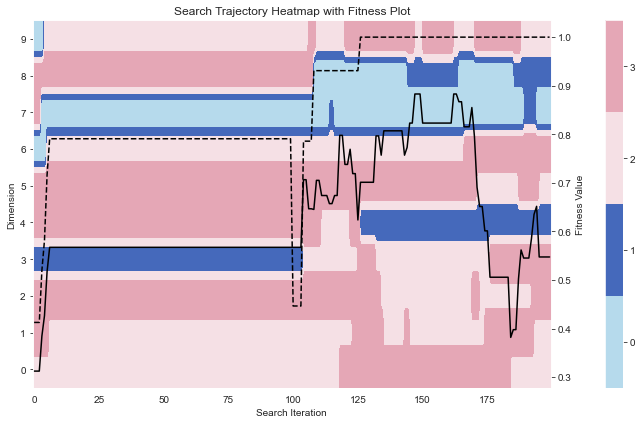

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# SG
# Generate random positions and fitness values
num_positions = search_iteration * 2
num_dimensions = N
# Needed info: positions, fitness, cog_fitness
positions = np.array(sg_trajectory_1, dtype=int)
fitness_values = sg_fitness_1
cog_fitness_values = sg_cog_fitness_1

# Create a colormap for the heatmap
# cmap = cm.get_cmap('viridis', 4)  # 4 colors for values 0, 1, 2, 3
cmap = colors.ListedColormap([shallow_blue, deep_blue, shallow_pink, deep_pink])

# Create the figure and two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis with ax1

# Set aspect ratio to 'auto' for proper proportions
im = ax1.imshow(positions.T, cmap=cmap, aspect='auto', extent=[-0.5, num_positions - 0.5, -0.5, num_dimensions - 0.5])

# Plot the fitness values as a line graph on the second y-axis
ax2.plot(range(num_positions), fitness_values, color='k', label="Fitness")
plt.plot(range(num_positions), cog_fitness_values, "k--", label="Cognitive Fitness")

# Set tick labels and limits for the x-axis
# x_ticks = np.arange(0, num_positions, 5)
# ax1.set_xticks(x_ticks)
# ax1.set_xticklabels(x_ticks)

# Set tick labels and limits for the y-axis (position dimension)
y_ticks = np.arange(num_dimensions)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks)
ax1.set_ylim([-0.5, num_dimensions - 0.5])

# Set tick labels and limits for the second y-axis (fitness values)
ax2.set_ylabel('Fitness Value')
# ax2.set_ylim([0, 1])

# Add colorbar
cbar = fig.colorbar(im, ax=ax2, pad=0.08)  # Adjust the pad value as needed
cbar.set_ticks([0.375, 1.125, 1.875, 2.625])  # Center the colorbar ticks
cbar.set_ticklabels(['0', '1', '2', '3'])

# Add labels and title
ax1.set_xlabel('Search Iteration')
ax1.set_ylabel('Dimension')
ax1.set_title('Search Trajectory Heatmap with Fitness Plot')
ax1.grid(visible=False)
ax2.grid(visible=False)
# Adjust spacing to accommodate the second y-axis label and colorbar
fig.tight_layout()

# Display the heatmap and fitness plot
plt.savefig(data_folder + r"\SG_Trajectory_K_0.png", transparent=False, dpi=300)
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# SG
# Generate random positions and fitness values
num_positions = search_iteration * 2
num_dimensions = N
# Needed info: positions, fitness, cog_fitness
positions = np.array(sg_trajectory_1, dtype=int)
fitness_values = sg_fitness_1
cog_fitness_values = sg_cog_fitness_1

# Create a colormap for the heatmap
# cmap = cm.get_cmap('viridis', 4)  # 4 colors for values 0, 1, 2, 3
cmap = colors.ListedColormap([shallow_blue, deep_blue, shallow_pink, deep_pink])

# Create the figure and two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis with ax1

# Set aspect ratio to 'auto' for proper proportions
im = ax1.imshow(positions.T, cmap=cmap, aspect='auto', extent=[-0.5, num_positions - 0.5, -0.5, num_dimensions - 0.5])

# Plot the fitness values as a line graph on the second y-axis
ax2.plot(range(num_positions), fitness_values, color='k', label="Fitness")
plt.plot(range(num_positions), cog_fitness_values, "k--", label="Cognitive Fitness")

# Set tick labels and limits for the x-axis
# x_ticks = np.arange(0, num_positions, 5)
# ax1.set_xticks(x_ticks)
# ax1.set_xticklabels(x_ticks)

# Set tick labels and limits for the y-axis (position dimension)
y_ticks = np.arange(num_dimensions)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks)
ax1.set_ylim([-0.5, num_dimensions - 0.5])

# Set tick labels and limits for the second y-axis (fitness values)
ax2.set_ylabel('Fitness Value')
# ax2.set_ylim([0, 1])

# Add colorbar
cbar = fig.colorbar(im, ax=ax2, pad=0.08)  # Adjust the pad value as needed
cbar.set_ticks([0.375, 1.125, 1.875, 2.625])  # Center the colorbar ticks
cbar.set_ticklabels(['0', '1', '2', '3'])

# Add labels and title
ax1.set_xlabel('Search Iteration')
ax1.set_ylabel('Dimension')
ax1.set_title('Search Trajectory Heatmap with Fitness Plot')
ax1.grid(visible=False)
ax2.grid(visible=False)
# Adjust spacing to accommodate the second y-axis label and colorbar
fig.tight_layout()

# Display the heatmap and fitness plot
plt.savefig(data_folder + r"\SG_Trajectory_K_0.png", transparent=False, dpi=300)
plt.show()
